## Dataset
File `updated_pollution_dataset.csv` merupakan dataset yang diambil dari [Air Quality and Pollution Assessment](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/). Dataset ini berfokus pada penilaian kualitas udara di berbagai wilayah. Dataset ini berisi 5000 sampel dan mencakup faktor lingkungan dan demografi penting yang memengaruhi tingkat polusi.

Key Features:

1. **Temperature (°C)**: Rerata suhu di wilayah.
2. **Humidity (%)**: Kelembapan udara di wilayah.
3. **PM2.5 Concentration (µg/m³)**: Tingkat partikel halus.
4. **PM10 Concentration (µg/m³)**: Tingkat partikel kasar.
5. **NO2 Concentration (ppb)**: Tingkat nitrogen dioxide.
6. **SO2 Concentration (ppb)**: Tingkat sulfur dioxide.
7. **CO Concentration (ppm)**: Tingkat carbon monoxide.
8. **Proximity to Industrial Areas (km)**: Jarak ke wilayah industri terdekat.
9. **Population Density (people/km²)**: Jumlah penduduk per km² di wilayah.

Target Variable: **Air Quality**

- **Good**: Udara bersih dengan tingkat polusi rendah.
- **Moderate**: Kualitas udara dapat diterima tetapi terdapat beberapa polutan.
- **Poor**: Polusi yang nyata yang dapat menyebabkan masalah kesehatan bagi kelompok sensitif.
- **Hazardous**: Udara yang sangat tercemar menimbulkan risiko kesehatan yang serius bagi masyarakat.

Dataset ini akan digunakan untuk membuat model yang dapat memprediksi kualitas udara di suatu wilayah berdasarkan input *Key Features*. Model yang akan diimplementasikan adalah model RandomForestClassifier yang merupakan ensemble learning untuk task klasifikasi.

## Explanotary Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report
)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import joblib

In [2]:
df = pd.read_csv("updated_pollution_dataset.csv")
df.head(5).transpose()

,0,1,2,3,4
Temperature,29.8,28.3,23.1,27.1,26.5
Humidity,59.1,75.6,74.7,39.1,70.7
PM2.5,5.2,2.3,26.7,6.1,6.9
PM10,17.9,12.2,33.8,6.3,16.0
NO2,18.9,30.8,24.4,13.5,21.9
SO2,9.2,9.7,12.6,5.3,5.6
CO,1.72,1.64,1.63,1.15,1.01
Proximity_to_Industrial_Areas,6.3,6.0,5.2,11.1,12.7
Population_Density,319,611,619,551,303
Air Quality,Moderate,Moderate,Moderate,Good,Good


### Deskripsi Kolom

Seluruh kolom dalam dataset memiliki tipe data numerik, kecuali pada target yang memiliki tipe data kategorik.

In [3]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


### Duplicate Value

In [6]:
duplicate_value = df[df.duplicated()]
print("Banyak data yang duplikat: ", len(duplicate_value))

Banyak data yang duplikat:  0


### Missing Value

In [7]:
missing_value = df.isnull().sum()
missing_value_row_count = df.isnull().any(axis=1).sum()
print("Banyaknya missing value pada tiap kolom:")
print(missing_value)
print()
print("Banyak row yang memiliki missing value:", missing_value_row_count)

Banyaknya missing value pada tiap kolom:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

Banyak row yang memiliki missing value: 0


### Distribution of Data

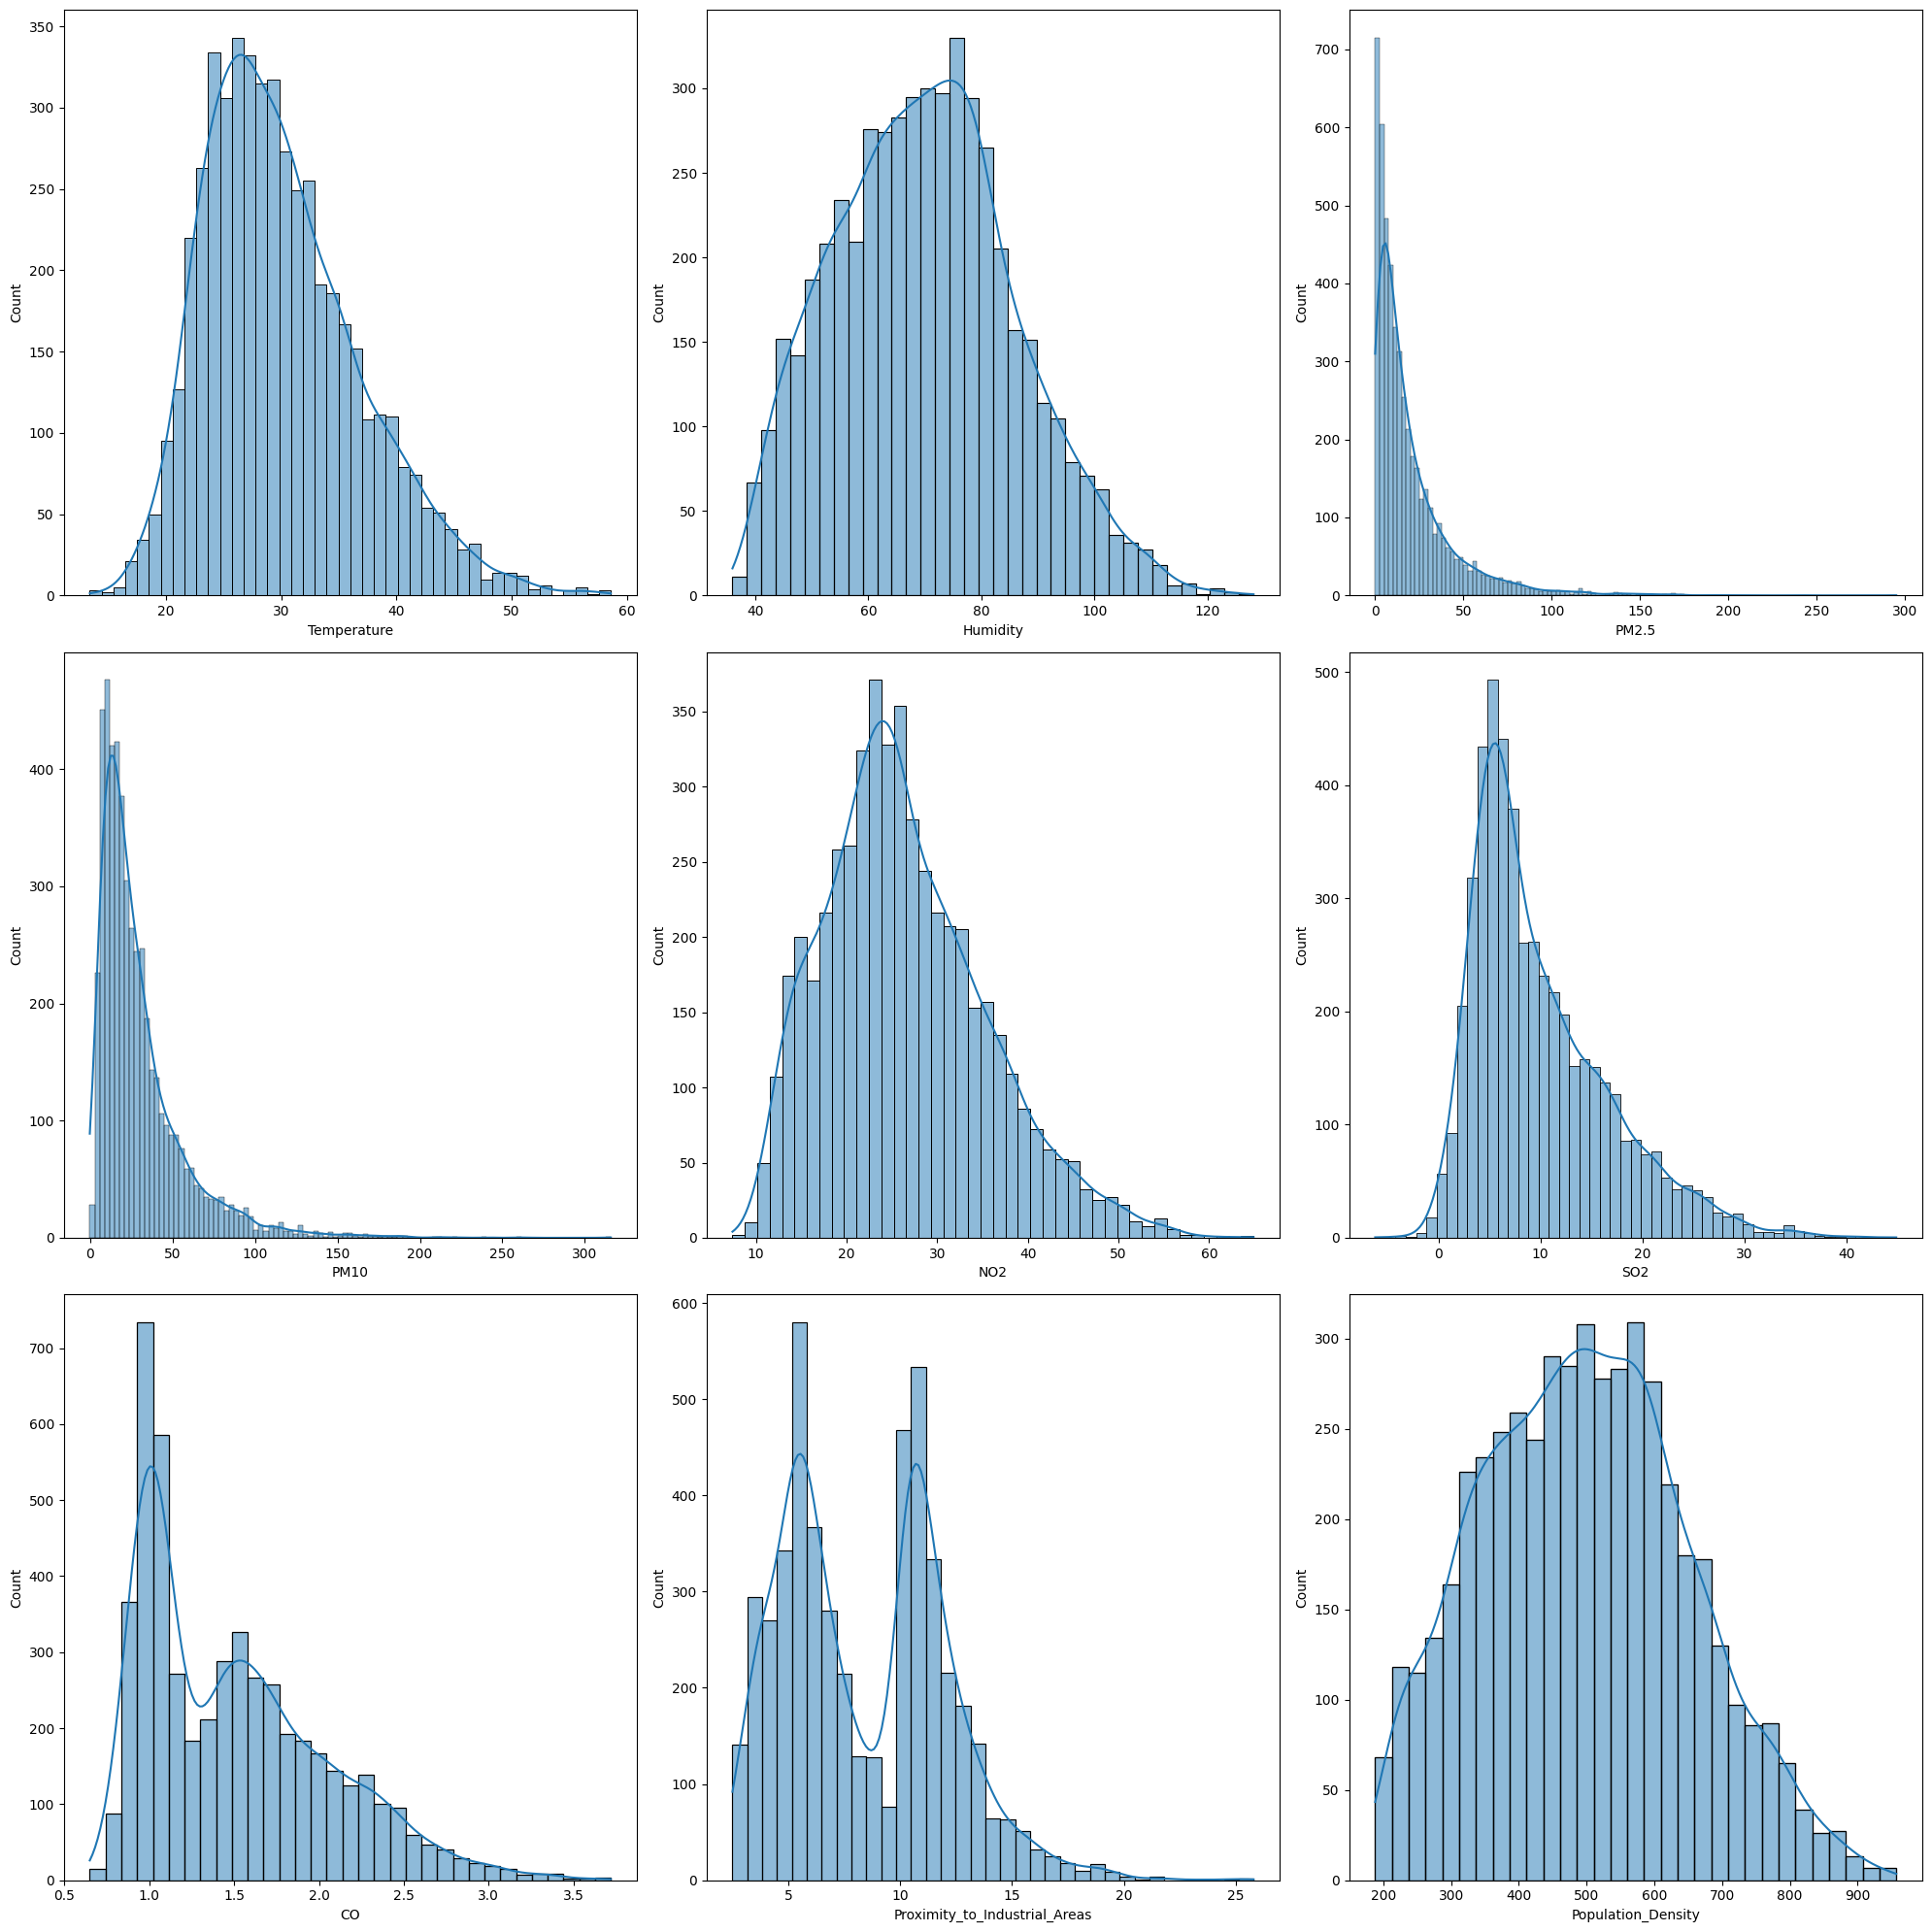

In [8]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

### Outliers

Terdapat 9 kolom yang memiliki outliers. Pada `Data Preprocessing` akan dilakukan penghapusan data outliers agar model yang dihasilkankan dapat memprediksi kualitas udara yang sesuai.

In [9]:
outliers_data = pd.DataFrame(columns=['label', 'lower_bound','upper_bound','lower_outliers', 'upper_outliers', 'total_outliers'])

numerical_column = ['Temperature', 'Humidity', 'PM2.5',
                    'PM10', 'NO2', 'SO2', 'CO',
                    'Proximity_to_Industrial_Areas', 'Population_Density']

for col in numerical_column:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        if len(df[col].unique()) == 2:
            continue
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr =  q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        lower_outliers = len(df[(df[col] < lower_bound)])
        upper_outliers = len(df[(df[col] > upper_bound)])
        total_outliers = lower_outliers + upper_outliers
        
        if(total_outliers == 0):
            continue

        outliers_data = outliers_data._append({'label': col,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers,
            'total_outliers': total_outliers}, ignore_index=True)

outliers_data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8488\2935613768.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outliers_data = outliers_data._append({'label': col,


,label,lower_bound,upper_bound,lower_outliers,upper_outliers,total_outliers
0,Temperature,11.7500,47.3500,0,72,72
1,Humidity,25.3000,113.3000,0,19,19
2,PM2.5,-27.6500,58.3500,0,352,352
3,PM10,-26.4000,76.8000,0,324,324
4,NO2,2.4000,49.6000,0,73,73
5,SO2,-7.8375,26.6625,0,124,124
6,CO,-0.1850,3.0550,0,45,45
7,Proximity_to_Industrial_Areas,-3.1500,19.6500,0,16,16
8,Population_Density,52.5000,928.5000,0,7,7


#### Balance of Data

Terdapat 4 kelas pada kolom target. Kelas yang paling sering muncul adalah `Good`. Kelas yang paling sedikit muncul adalah `Hazardous`. Jumlah kelas tidak berimbang, sehingga perlu dilakukan penyesuaian dengan melakukan salah satu dari tiga opsi, yaitu under-sampling, over-sampling, dan SMOTE.

In [10]:
unique_values, unique_count = np.unique(df["Air Quality"], return_counts=True)
class_value = pd.DataFrame({"Values": unique_values, "Count": unique_count})

class_value

,Values,Count
0,Good,2000
1,Hazardous,500
2,Moderate,1500
3,Poor,1000


#### Target-Column Relationship

Berdasarkan hasil visualisasi, seluruh kolom cenderung memiliki korelasi tinggi terhadap kelas `Hazardous` ketika memiliki nilai yang tinggi dan berkolerasi tinggi terhadap kelas `Good` ketika memiliki nilai yang rendah. Tetapi pada kolom `Proximity_to_Industrial_Areas`, terdapat perbedaan tren terhadap kelas `Hazardous` dan `Good` yang menggambarkan bahwa semakin jauh kawasan industri dari tempat pemukiman, maka semain baik kualitas udara suatu kawasan. Kelas `Moderate` dan `Poor` selalu berada di antar kelas `Good` dan `Hazardous`.

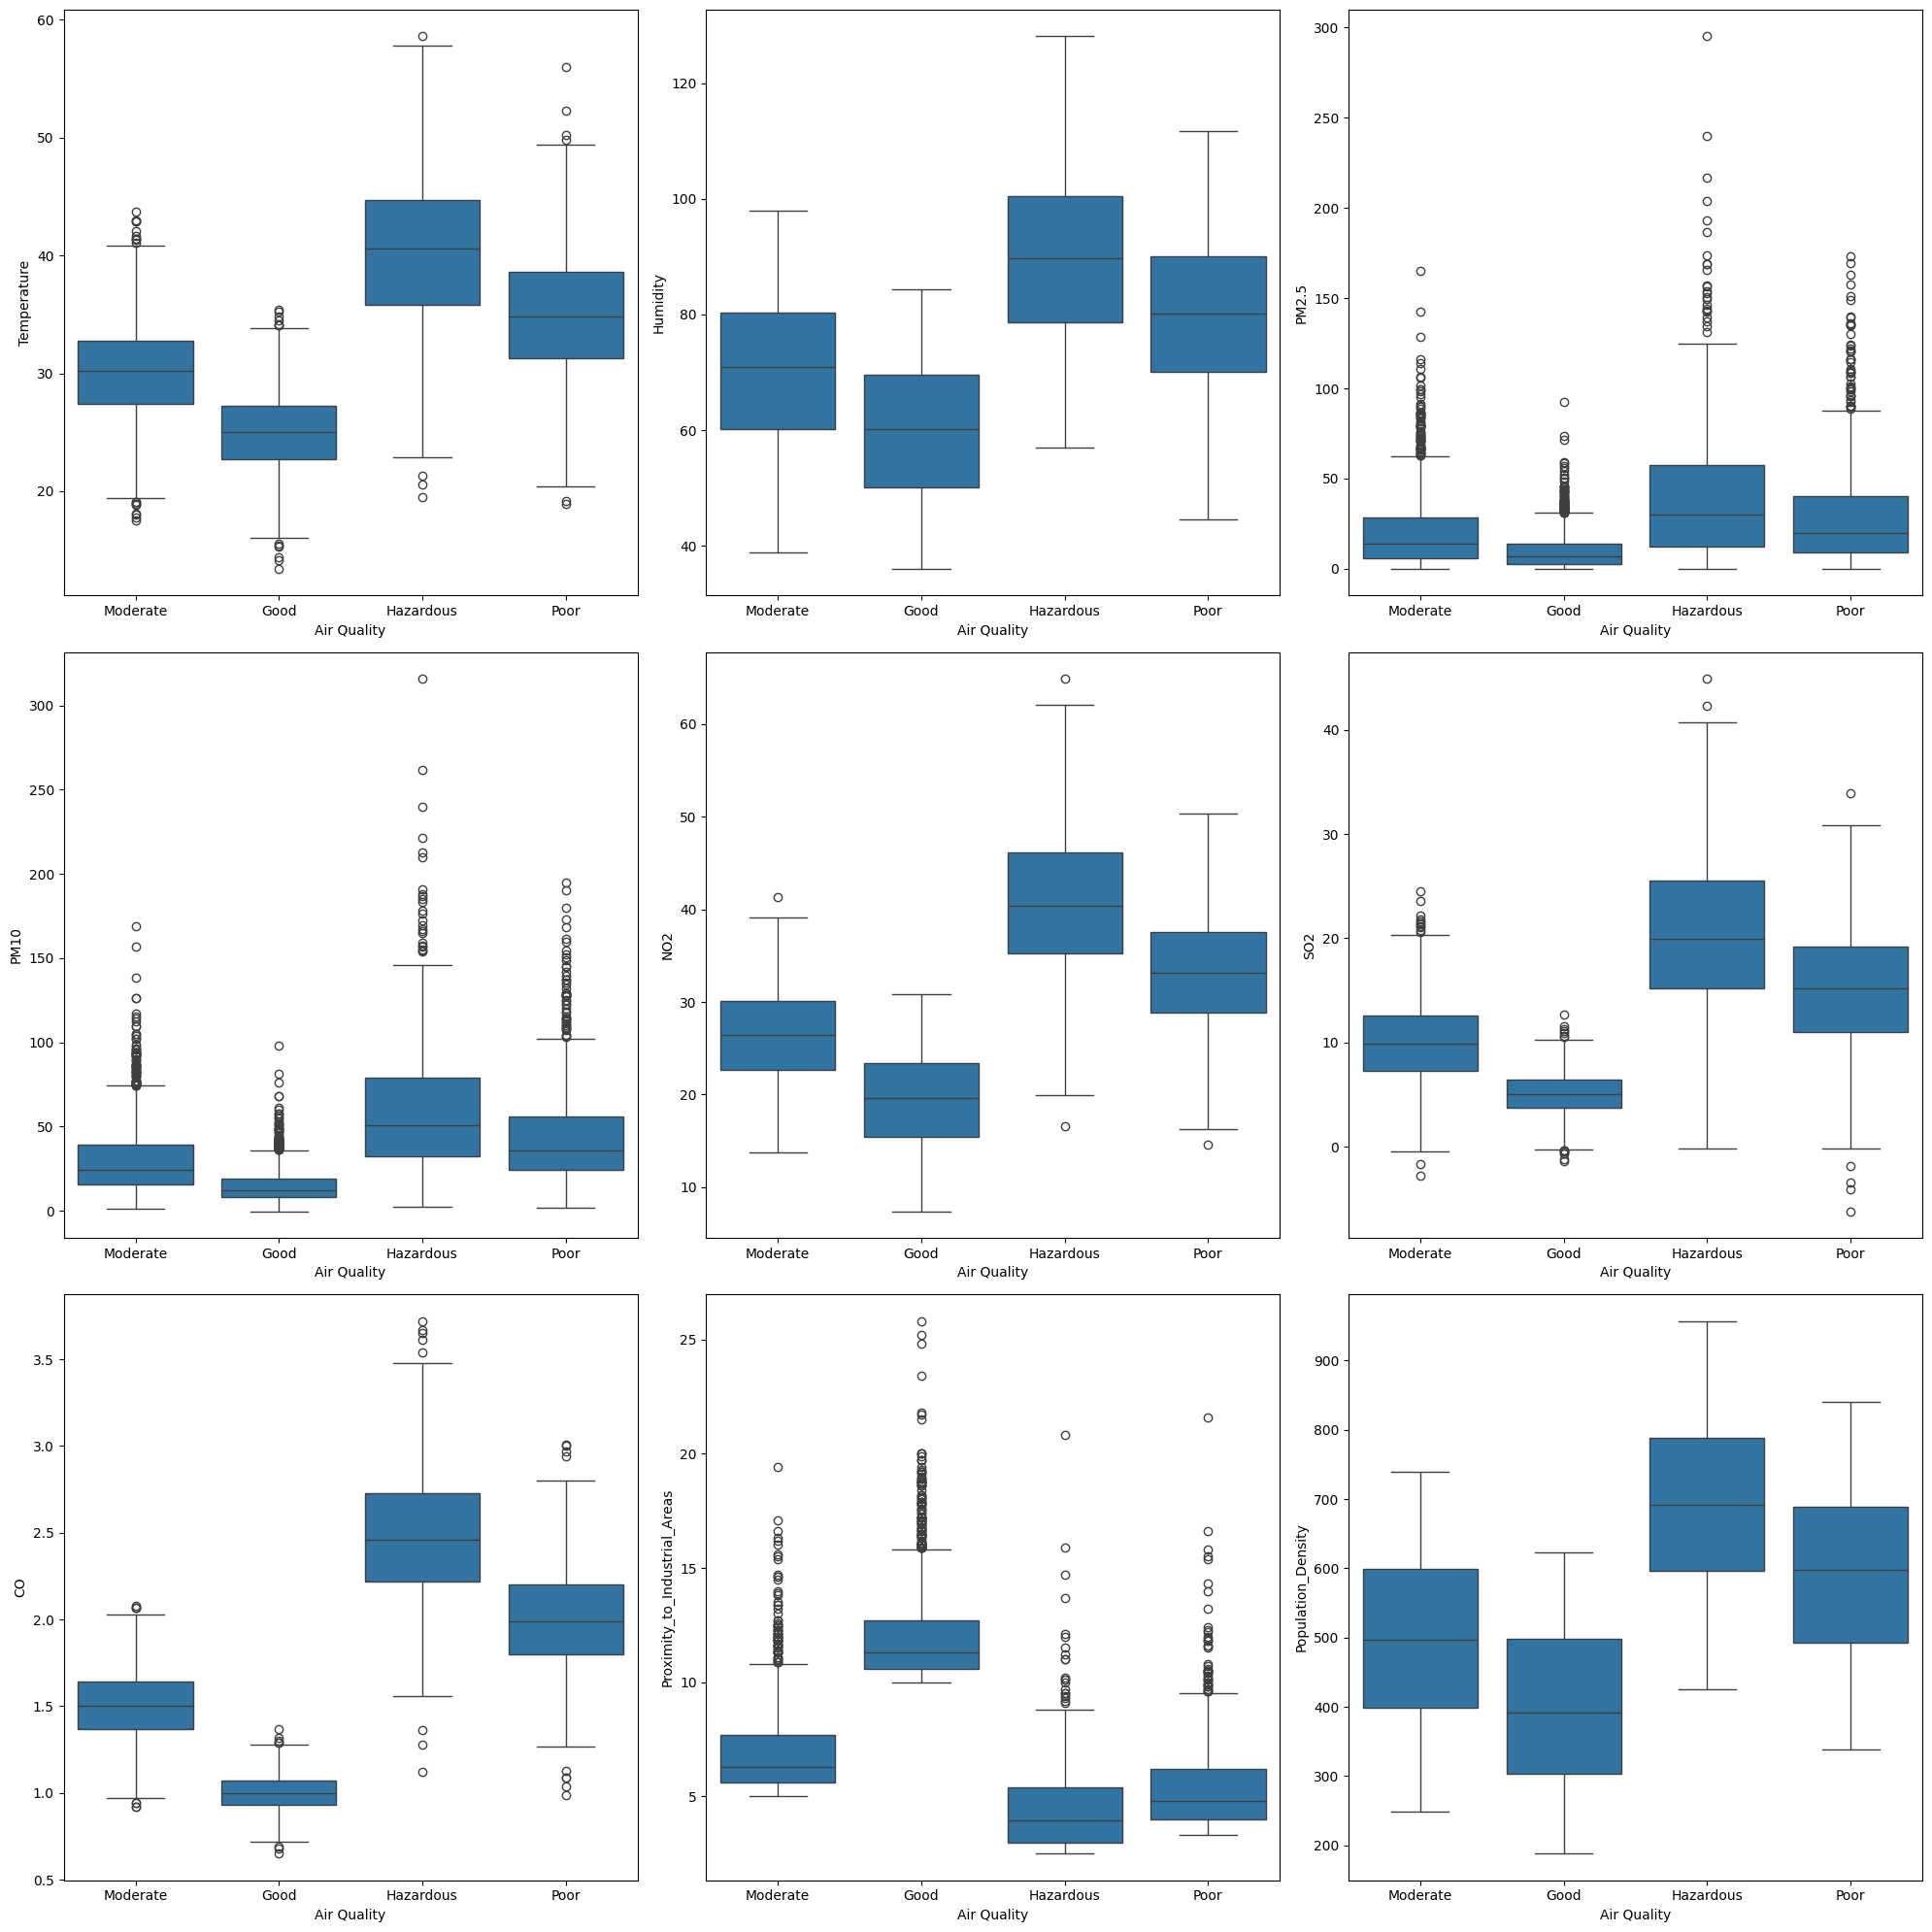

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [12]:
df = pd.read_csv("updated_pollution_dataset.csv")

### Label Encoding

In [13]:
le=LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])
df['Air Quality'].unique()

array([2, 0, 1, 3])

#### Removing Outliers

In [14]:
for col in df.drop(columns='Air Quality').columns:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    df=df[(df[col]>=lb)&(df[col]<=ub)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


### Scaling

In [16]:
scalers = {}

for col in df.drop(columns='Air Quality').columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[[col]])
        scalers[col] = scaler

df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,0.483776,0.304749,0.091873,0.283255,0.292621,0.523810,0.540404,0.224852,0.194651,2
1,0.439528,0.522427,0.040636,0.194053,0.595420,0.540816,0.500000,0.207101,0.628529,2
2,0.286136,0.510554,0.471731,0.532081,0.432570,0.639456,0.494949,0.159763,0.640416,2
3,0.404130,0.040897,0.107774,0.101721,0.155216,0.391156,0.252525,0.508876,0.539376,0
4,0.386431,0.457784,0.121908,0.253521,0.368957,0.401361,0.181818,0.603550,0.170877,0


### Data Resampling

#### Split Data

In [17]:
X = df.drop(columns="Air Quality")
y = df["Air Quality"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

#### Undersampling

In [18]:
sampler_undersampler = RandomUnderSampler(random_state=42)
X_train_undersampling, y_train_undersampling = sampler_undersampler.fit_resample(X_train, y_train)

# instantiate the model
logReg = LogisticRegression(random_state=40, max_iter=1000)

# fit the model
logReg.fit(X_train_undersampling,y_train_undersampling)

# predict validation
y_pred_val = logReg.predict(X_test)

# jumlah sample
print(f'Jumlah Sampel: {len(X_train_undersampling)}')

# check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_val)))
print('F1 Score: {0:0.4f}'.format(f1_score(y_pred_val, y_test, average='weighted')))

unique_values, unique_count = np.unique(y_train_undersampling, return_counts=True)
class_value = pd.DataFrame({"Values": unique_values, "Count": unique_count})

class_value

Jumlah Sampel: 236
Model accuracy score: 0.8930
F1 Score: 0.8863


,Values,Count
0,0,59
1,1,59
2,2,59
3,3,59


#### Oversampling

In [19]:
sampler_oversampler = RandomOverSampler(sampling_strategy="minority", random_state=42)
X_train_oversampling, y_train_oversampling = sampler_oversampler.fit_resample(X_train, y_train)

# instantiate the model
logReg = LogisticRegression(random_state=40, max_iter=1000)

# fit the model
logReg.fit(X_train_oversampling,y_train_oversampling)

# predict validation
y_pred_val = logReg.predict(X_test)

# jumlah sample
print(f"Jumlah Sampel: {len(X_train_oversampling)}")

# check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_val)))
print('F1 Score: {0:0.4f}'.format(f1_score(y_pred_val, y_test, average='weighted')))

unique_values, unique_count = np.unique(y_train_oversampling, return_counts=True)
class_value = pd.DataFrame({"Values": unique_values, "Count": unique_count})

class_value

Jumlah Sampel: 3849
Model accuracy score: 0.9062
F1 Score: 0.9047


,Values,Count
0,0,1248
1,1,1248
2,2,875
3,3,478


#### SMOTE

In [20]:
sampler = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = sampler.fit_resample(X_train, y_train)

# instantiate the model
logReg = LogisticRegression(random_state=40, max_iter=1000)

# fit the model
logReg.fit(X_train_SMOTE,y_train_SMOTE)

# predict validation
y_pred_val = logReg.predict(X_test)

# jumlah sample
print(f"Jumlah Sampel: {len(X_train_SMOTE)}")

# check accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_val)))
print('F1 Score: {0:0.4f}'.format(f1_score(y_pred_val, y_test, average='weighted')))

unique_values, unique_count = np.unique(y_train_SMOTE, return_counts=True)
class_value = pd.DataFrame({"Values": unique_values, "Count": unique_count})

class_value

Jumlah Sampel: 4992
Model accuracy score: 0.9411
F1 Score: 0.9393


,Values,Count
0,0,1248
1,1,1248
2,2,1248
3,3,1248


#### Sampling - Final
Berdasarkan akurasi model dan f1 score, maka metode yang dipilih untuk sampling adalah `SMOTE`.

In [21]:
sampler = SMOTE(random_state=42)
X_train, y_train = sampler.fit_resample(X_train, y_train)


print(f"Jumlah Sampel: {len(X_train)}")

unique_values, unique_count = np.unique(y_train, return_counts=True)
class_value = pd.DataFrame({"Values": unique_values, "Count": unique_count})

class_value

Jumlah Sampel: 4992


,Values,Count
0,0,1248
1,1,1248
2,2,1248
3,3,1248


In [22]:
X_train.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,0.743363,0.530343,0.459364,0.765258,0.646310,0.329932,0.742424,0.071006,0.630015
1,0.702065,0.770449,0.367491,0.583725,0.562341,0.578231,0.510101,0.343195,0.509658
2,0.548673,0.349604,0.001767,0.082942,0.325700,0.367347,0.121212,0.455621,0.019316
3,0.628319,0.682058,0.791519,0.723005,0.722646,0.615646,0.737374,0.118343,0.423477
4,0.486726,0.267810,0.245583,0.255086,0.142494,0.323129,0.171717,0.455621,0.491828


## Model Training

### Random Forest Model

In [23]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train.values.ravel())

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best estimator on the validation set
y_val_pred = best_rf_classifier.predict(X_val)
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate the best estimator on the test set
y_test_pred = best_rf_classifier.predict(X_test)
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       323
           1       0.77      0.62      0.69        16
           2       1.00      0.92      0.95       228
           3       0.81      0.96      0.88        99

    accuracy                           0.96       666
   macro avg       0.89      0.88      0.88       666
weighted avg       0.96      0.96      0.96       666

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.64      0.64      0.64        14
           2       0.98      0.97      0.97       286
           3       0.90      0.91      0.90       123

    accuracy                           0.97       832
 

## Exporting Model and Encoder

In [24]:
# Save the best model to a file
joblib.dump(best_rf_classifier, "./model/model.pkl")
print("Best model saved to /model/model.pkl")

Best model saved to /model/model.pkl


In [25]:
# Save the best model to a file
joblib.dump(le, "./model/label_encoder.pkl")
print("Label encoder saved to ./model/label_encoder.pkl")

Label encoder saved to ./model/label_encoder.pkl


In [26]:
# Save all scalers for future use
joblib.dump(scalers, "./model/scalers.pkl")
print("Scalers saved to ./model/scalers.pkl")

Scalers saved to ./model/scalers.pkl
